<a href="https://colab.research.google.com/github/anjuli0802/OIBSIP-TASK_5_SALES_PRICE_PREDICTION_USING_PYTHON/blob/main/salesPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sales_data = pd.read_csv("/content/Advertising[1].csv")

In [4]:
sales_data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
sales_data.shape

(200, 5)

In [6]:
sales_data.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [7]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [8]:
sales_data.isna().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [9]:
sales_data.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [10]:
sales_data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [11]:
sales_data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


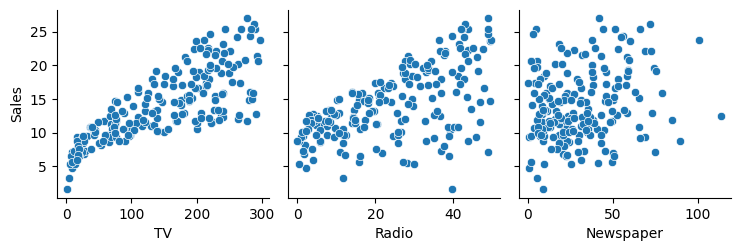

In [15]:
sns.pairplot(sales_data, x_vars = ["TV","Radio","Newspaper"], y_vars = "Sales", kind = 'scatter')
plt.show();

<Axes: ylabel='Frequency'>

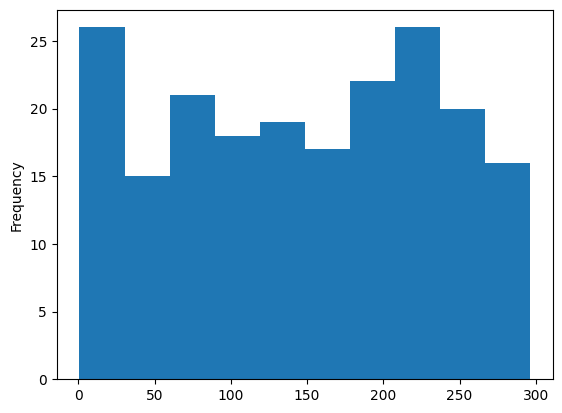

In [16]:
sales_data['TV'].plot.hist(bins = 10)

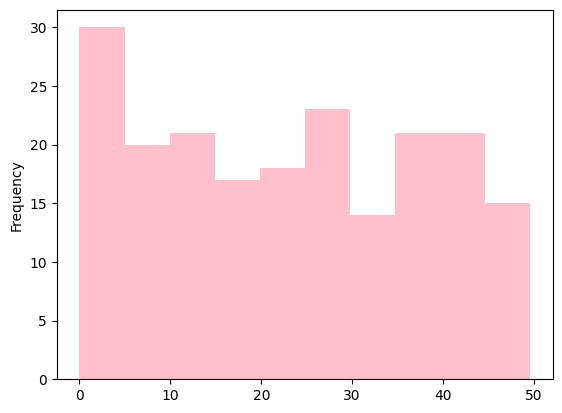

In [17]:
sales_data['Radio'].plot.hist(bins = 10, color = "pink", xlabel = "Radio");

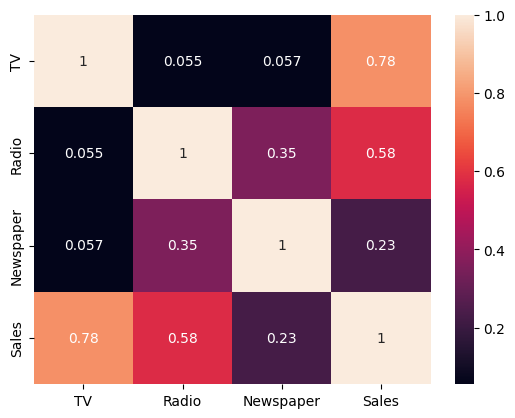

In [18]:
sns.heatmap(sales_data.corr(), annot = True)
plt.show();

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X = sales_data['TV']
Y = sales_data['Sales']

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(sales_data[['TV']], sales_data[['Sales']], test_size = 0.2, random_state = 42)

In [28]:
X_train

,TV
79,116.0
197,177.0
38,43.1
24,62.3
122,224.0
...,...
106,25.0
14,204.1
92,217.7
179,165.6


In [29]:
Y_train

,Sales
79,11.0
197,12.8
38,10.1
24,9.7
122,11.6
...,...
106,7.2
14,19.0
92,19.4
179,12.6


In [24]:
from sklearn.linear_model import LinearRegression

In [30]:
model = LinearRegression()

In [31]:
model.fit(X_train, Y_train)

LinearRegression()

In [32]:
result = model.predict(X_test)
result

array([[14.71794394],
       [16.2115484 ],
       [20.74819743],
       [ 7.66403631],
       [17.37013877],
       [10.61402143],
       [17.2072847 ],
       [ 9.44612512],
       [17.46785121],
       [15.2669948 ],
       [ 8.58532504],
       [ 9.73460946],
       [18.03086098],
       [ 7.37089899],
       [13.61053628],
       [15.03899911],
       [ 7.45930549],
       [16.31391381],
       [10.62332738],
       [18.16579721],
       [17.79821232],
       [10.27435438],
       [ 8.88776831],
       [18.79394862],
       [10.33019006],
       [ 9.60897918],
       [17.05373658],
       [13.60123034],
       [11.17703121],
       [ 7.51048819],
       [16.41627922],
       [10.339496  ],
       [16.37440246],
       [ 7.90599093],
       [20.18053468],
       [18.203021  ],
       [ 9.36702457],
       [19.85482655],
       [12.57292322],
       [ 8.39920611]])

In [33]:
model.coef_

array([[0.04652973]])

In [34]:
model.intercept_

array([7.11963843])

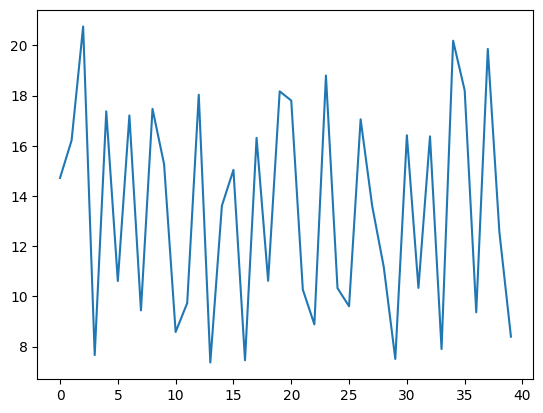

In [35]:
plt.plot(result)